### Import Libraries

In [25]:
import pandas as pd    #pandas 
import numpy as np     # numpy
import glob
#visulaization library
import matplotlib.pyplot as plt
import seaborn as sns
#to display all rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Spacy text processing 
import spacy
import en_core_web_sm
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import gensim

### Data loading

In [26]:
path = r'C:\Users\user\Desktop\FiverProject\Project1' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,TweetID,TweetDate,TweetText,retweetCount,FavouriteCount,IsFavourite,ISretweetd,userDate,screen_name,status_count,follower_count,freind_count,userFavouriteCount
0,1388361699825160198,2021-05-01 05:16:38,RT @PromostylParis: Eco-friendly essential ♻️\...,3,0,False,False,2011-01-26 08:29:27,elvia_francis,30064,783,3244,39802
1,1388205043422310402,2021-04-30 18:54:08,RT @rachellsarnoff: New initiative to draw car...,1,0,False,False,2021-01-11 16:56:45,SustainTrends,172107,3538,158,25789
2,1388205019284090880,2021-04-30 18:54:02,New initiative to draw carbon from air polluti...,1,0,False,False,2008-07-18 00:17:09,rachellsarnoff,13895,7604,6773,2890
3,1388019900103471108,2021-04-30 06:38:27,RT @PromostylParis: Eco-friendly essential ♻️\...,3,0,False,False,2009-10-12 13:04:46,faridatir,2583,160,132,1204
4,1387732819175161856,2021-04-29 11:37:41,RT @PromostylParis: Eco-friendly essential ♻️\...,3,0,False,False,2010-05-06 23:33:58,imagine_garden,244710,5028,995,4102


In [27]:
frame.to_csv("data.csv",index=False)

In [28]:
print(frame.shape)
frame['TweetID'].nunique()

(2050, 13)


372

In [30]:
frame.head()

,TweetID,TweetDate,TweetText,retweetCount,FavouriteCount,IsFavourite,ISretweetd,userDate,screen_name,status_count,follower_count,freind_count,userFavouriteCount
0,1388361699825160198,2021-05-01 05:16:38,RT @PromostylParis: Eco-friendly essential ♻️\...,3,0,False,False,2011-01-26 08:29:27,elvia_francis,30064,783,3244,39802
1,1388205043422310402,2021-04-30 18:54:08,RT @rachellsarnoff: New initiative to draw car...,1,0,False,False,2021-01-11 16:56:45,SustainTrends,172107,3538,158,25789
2,1388205019284090880,2021-04-30 18:54:02,New initiative to draw carbon from air polluti...,1,0,False,False,2008-07-18 00:17:09,rachellsarnoff,13895,7604,6773,2890
3,1388019900103471108,2021-04-30 06:38:27,RT @PromostylParis: Eco-friendly essential ♻️\...,3,0,False,False,2009-10-12 13:04:46,faridatir,2583,160,132,1204
4,1387732819175161856,2021-04-29 11:37:41,RT @PromostylParis: Eco-friendly essential ♻️\...,3,0,False,False,2010-05-06 23:33:58,imagine_garden,244710,5028,995,4102


In [29]:
frame.columns

Index(['TweetID', 'TweetDate', 'TweetText', 'retweetCount', 'FavouriteCount',
       'IsFavourite', 'ISretweetd', 'userDate', 'screen_name', 'status_count',
       'follower_count', 'freind_count', 'userFavouriteCount'],
      dtype='object')

In [24]:
frame['TweetDate'].unique()

array(['2021-05-01 05:16:38', '2021-04-30 18:54:08',
       '2021-04-30 18:54:02', '2021-04-30 06:38:27',
       '2021-04-29 11:37:41', '2021-04-29 11:34:42',
       '2021-04-28 22:44:39', '2021-04-27 11:00:01',
       '2021-05-01 17:35:10', '2021-05-01 13:35:00',
       '2021-05-01 12:28:01', '2021-05-01 10:26:22',
       '2021-05-01 10:02:00', '2021-05-01 05:18:34',
       '2021-05-01 05:17:37', '2021-05-01 05:16:43',
       '2021-04-30 16:09:46', '2021-04-30 15:55:00',
       '2021-04-30 15:18:28', '2021-04-30 12:00:00',
       '2021-04-30 08:50:27', '2021-04-29 17:18:27',
       '2021-04-29 15:53:10', '2021-04-29 15:32:38',
       '2021-04-29 15:32:21', '2021-04-29 12:20:56',
       '2021-04-29 12:05:54', '2021-04-29 11:34:03',
       '2021-04-29 08:00:13', '2021-04-29 05:35:00',
       '2021-04-28 16:00:01', '2021-04-28 14:55:54',
       '2021-04-28 14:08:28', '2021-04-28 14:01:33',
       '2021-04-28 12:04:00', '2021-04-28 08:26:47',
       '2021-04-28 01:58:21', '2021-04-28 01:5

In [6]:
frame['screen_name'].nunique()

270

### Analyzing text statistics

word frequency analysis,

sentence length analysis,

average word length analysis,

Text(0.5, 1.0, 'Length of Tweets')

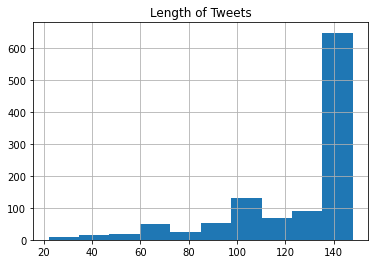

In [7]:
frame['TweetText'].str.len().hist()
plt.title('Length of Tweets')

The histogram shows that Tweets range from 21 to 145 characters

Text(0.5, 1.0, 'count of words in Tweet')

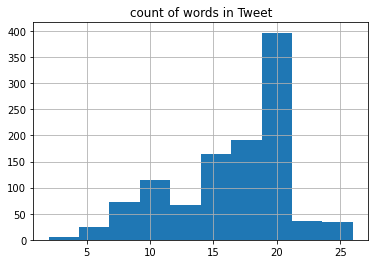

In [8]:
text=frame['TweetText']
text.str.split().map(lambda x: len(x)).hist()
plt.title('count of words in Tweet')

it is clear that the number of words in Tweet ranges from 5 to 25 and mostly falls between 15 to 21 words.

Text(0.5, 1.0, 'Average word length')

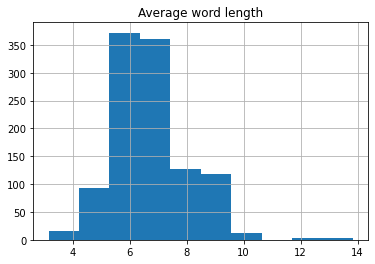

In [9]:
text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('Average word length')

The average word length ranges between 3 to 10 with 6 being the most common length

In [10]:
nltk.download('stopwords')
  
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Stop Word Corpus')

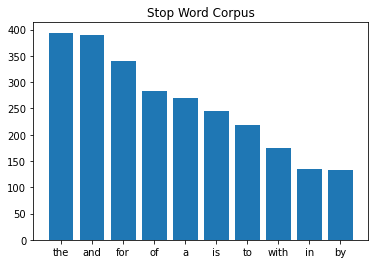

In [11]:
corpus=[]
new= frame['TweetText'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title('Stop Word Corpus')

We can evidently see that stopwords such as 'the','and' and 'for' dominate in Tweets.

##### So now we know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently.

<AxesSubplot:>

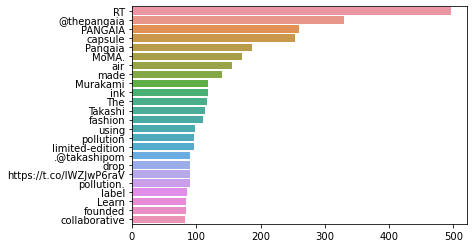

In [12]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

### Ngram exploration

<AxesSubplot:title={'center':'BI gram'}>

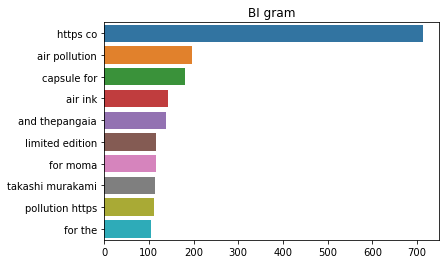

In [13]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(frame['TweetText'],2)
x,y=map(list,zip(*top_n_bigrams))
plt.title('BI gram')
sns.barplot(x=y,y=x)

<AxesSubplot:title={'center':'Tri gram'}>

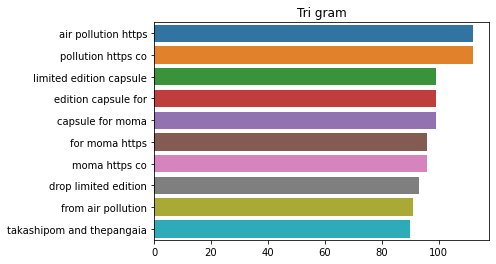

In [14]:
top_tri_grams=get_top_ngram(frame['TweetText'],n=3)
x,y=map(list,zip(*top_tri_grams))
plt.title('Tri gram')
sns.barplot(x=y,y=x)

### Topic modeling exploration with pyLDAvis

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

### NLP Preprocessing and data cleaning

#### tokenize: the process by which sentences are converted to a list of tokens or words.



#### remove stopwords

#### lemmatize: reduces the inflectional forms of each word into a common base or root.



#### convert to the bag of words: 

Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the 

number of times each word occurs in the corpus.

In [15]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()  #stemming 
    lem=WordNetLemmatizer() #lemmatizing 
    for tweet in frame['TweetText']:
        words=[w for w in nltk.tokenize.word_tokenize(tweet) if (w not in stop_words)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_news(frame)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
corpus

[['PromostylParis',
  'Eco-friendly',
  'essential',
  'The',
  'eco-friendly',
  'brand',
  'thepangaia',
  'unveils',
  'new',
  'capsule',
  'collection',
  'composed',
  'hoodies',
  't-…'],
 ['Eco-friendly',
  'essential',
  'The',
  'eco-friendly',
  'brand',
  'thepangaia',
  'unveils',
  'new',
  'capsule',
  'collection',
  'composed',
  'hoodies…',
  'http',
  '//t.co/pEyQgzmAUr'],
 ['re-selling',
  'blue',
  'pangaia',
  'tracksuit',
  'size',
  'pls',
  'detail',
  'pangaia',
  'kuwait',
  'resell',
  'forsale',
  'sale',
  'sweatpants'],
 ['Check', 'latest', 'PANGAIA', 'look', 'modeled', 'NaomiCampbell'],
 ['techonomy',
  'thepangaia',
  'amandajparkes',
  'much',
  'love',
  'story',
  'Pangaia',
  'creating',
  'material',
  'flower…',
  'http',
  '//t.co/tsZJDlsZpV'],
 ['PANGAIA',
  'launched',
  'newest',
  'capsule',
  'collection',
  'using',
  'innovative',
  'AIR-INK®',
  'technology',
  'developed',
  'partnership',
  'GravikyLabs'],
 ['spy',
  'new',
  'FLWDWN',


#### Bag of Word Model 

In [17]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(0, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (10, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(12, 1),
  (16, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(4, 1),
  (5, 1),
  (31, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(10, 1),
  (12, 1),
  (16, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(12, 1),
  (16, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),


In [18]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.056*"http" + 0.043*"pollution" + 0.036*"air" + 0.033*"ink" + 0.030*"made" + 0.029*"thepangaia" + 0.026*"fashion" + 0.026*"Pangaia" + 0.024*"using" + 0.021*"label"'),
 (1,
  '0.044*"http" + 0.044*"Pangaia" + 0.013*"ThePangaia" + 0.011*"EarthDay" + 0.010*"pollution" + 0.010*"sustainable" + 0.010*"brand" + 0.009*"sustainability" + 0.009*"The" + 0.008*"KeepCup"'),
 (2,
  '0.081*"http" + 0.051*"thepangaia" + 0.038*"capsule" + 0.030*"MoMA" + 0.029*"takashipom" + 0.029*"limited-edition" + 0.028*"drop" + 0.028*"//t.co/IWZJwP6raV" + 0.027*"ComplexStyle" + 0.025*"The"'),
 (3,
  '0.051*"PANGAIA" + 0.043*"http" + 0.040*"thepangaia" + 0.026*"Takashi" + 0.025*"Murakami" + 0.022*"MoMA" + 0.021*"gravikylabs" + 0.019*"founded" + 0.019*"Learn" + 0.019*"capsule"')]

In [19]:
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

ModuleNotFoundError: No module named 'pyLDAvis'